# Experiment 3: Visual Evaluation
Check the image segmentation performance of models visually and see how well they perform.

In [1]:
# Import section
import os
import torch
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
from models.unet import UNet
from util.data_loader import get_seg_data_loaders
from evaluation.metrics import iou, pixel_accuracy

In [6]:
model_types = ['unet', 'autoencoder_segmentation', 'clip']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_selected = model_types[0]
model_file = "unet_2025-03-15_01-13-01_val_0.2942.pth"
_, _, test_loader = get_seg_data_loaders()

model_path = os.path.join(os.getcwd(), "weights",
                          model_selected, model_file)
model = UNet()
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

UNet(
  (encoder): UNetEncoder(
    (enc1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (enc2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (enc3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (enc4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(in

In [7]:
model.eval()
total_loss = 0
with torch.no_grad():
    for batch_id, (images, masks) in enumerate(test_loader):
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        break
        

In [17]:
def show_image(image):
    if device == torch.device('cuda'):
        image = image.cpu()
    plt.imshow(image)
    plt.axis("off")
    plt.show()
  

def show_colored_mask(mask):
    """
    Display a segmentation mask with:
      - 0 as purple
      - 1 as yellow
      - 2 as blue
    """
    # Define a custom colormap. Each entry is (R, G, B) in [0..1].
    # Here:
    #   0 -> purple (128/255, 0, 128/255)
    #   1 -> yellow (1, 1, 0)
    #   2 -> blue   (0, 0, 1)
    if device == torch.device('cuda'):
        mask = mask.cpu()
    colors = [
        (128/255, 0, 128/255),  # class 0 (purple)
        (1, 1, 0),              # class 1 (yellow)
        (0, 0, 1),              # class 2 (blue)
    ]
    cmap = ListedColormap(colors)

    # vmin=0, vmax=2 ensures mask values are mapped exactly
    # to the three colors in the colormap.
    plt.imshow(mask, cmap=cmap, vmin=0, vmax=2)
    plt.axis("off")
    plt.show()

In [32]:
idx = 4

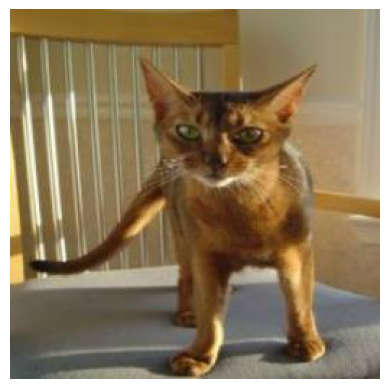

In [33]:
image = images[idx].permute(1, 2, 0)
show_image(image)

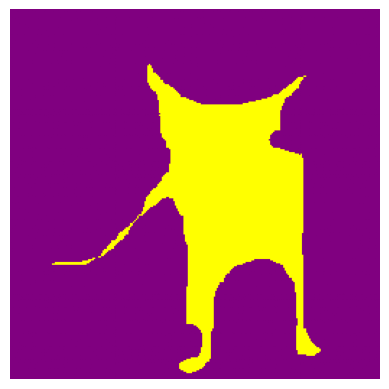

In [34]:
mask = masks[idx]
show_colored_mask(mask)

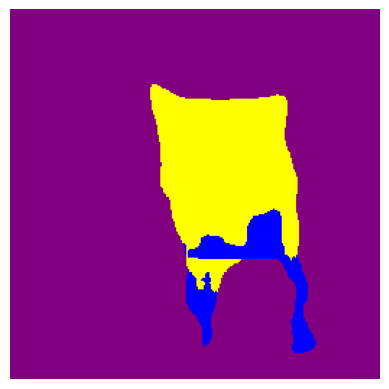

In [35]:
output = outputs[idx]
final_mask = torch.argmax(output, dim=0)
show_colored_mask(final_mask)

In [36]:
print((final_mask == 1).sum())
print((final_mask == 2).sum())
print((mask == 1).sum())
print((mask == 2).sum())

tensor(9135, device='cuda:0')
tensor(2559, device='cuda:0')
tensor(12035, device='cuda:0')
tensor(0, device='cuda:0')


In [37]:
iou(final_mask, mask)

[tensor([0.9566], device='cuda:0'), tensor([0.6504], device='cuda:0'), tensor([0.], device='cuda:0')]


0.5356869101524353

In [31]:
pixel_accuracy(final_mask, mask)

0.71734619140625